# Assignment 1

In [39]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

# 2. Classification
In this assignment, you will apply various classification techniques on a dataset to predict categorical outcomes. You will use Support Vector Machines (SVM), advanced decision tree classifiers, and Generalized Additive Models (GAMs) to build predictive models and compare their performance.

## Dataset
We will use the "Breast Cancer Wisconsin (Diagnostic)" dataset for this assignment. This dataset is included in the `sklearn.datasets` module.

## Tasks

### 1. Data Exploration and Preprocessing
* Begin by loading the dataset and conducting exploratory data analysis (EDA).
* Visualize the distribution of the classes (malignant and benign) and the features.
* Preprocess the data by handling missing values, encoding categorical variables if necessary, and scaling the features.





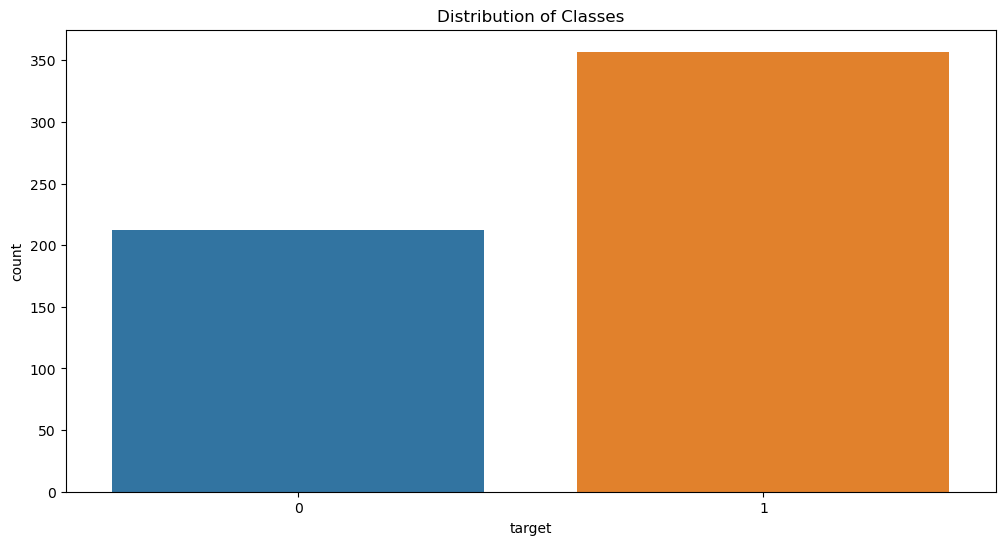

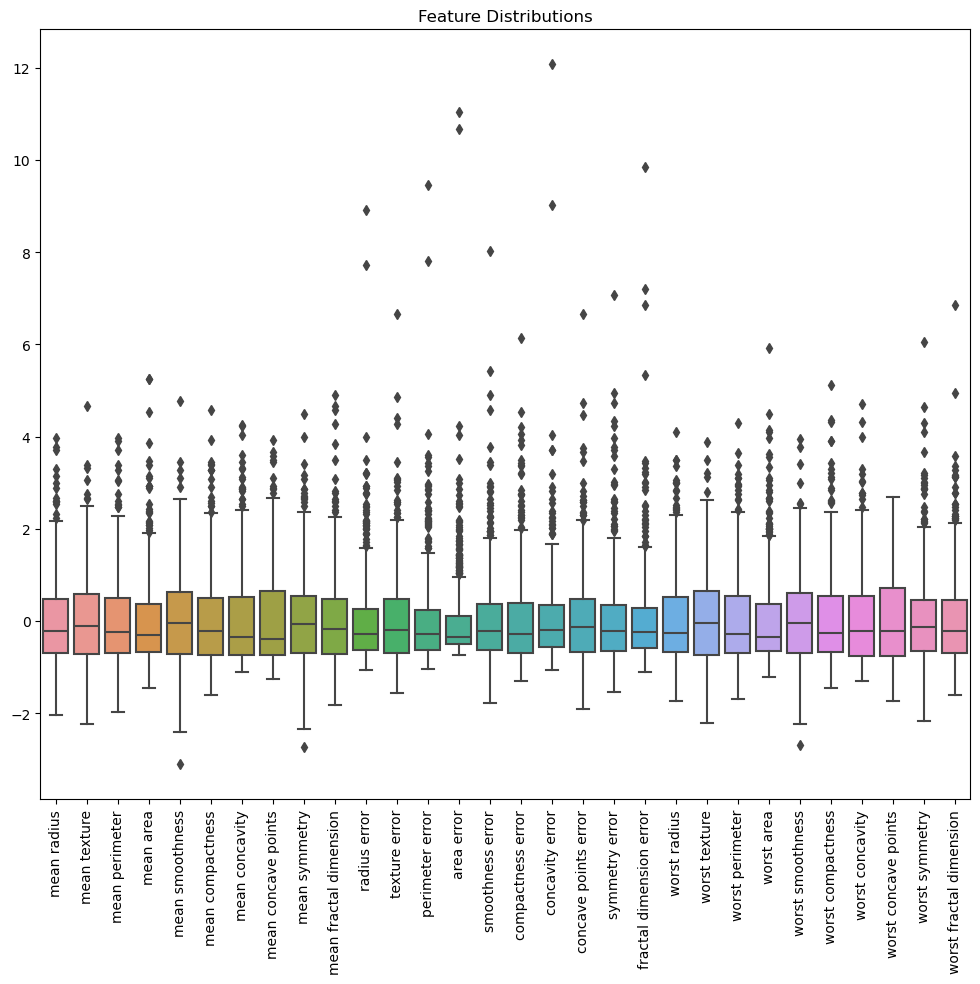

In [2]:
# Load the dataset
data = datasets.load_breast_cancer() 
X = data.data
y = data.target #212(M),357(B)

# Convert to DataFrame for easier visualization
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# EDA: Visualizing the distribution of classes and features
plt.figure(figsize=(12, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Classes')
plt.show()

# Preprocessing: Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_df =  pd.DataFrame(X_scaled, columns=data.feature_names)

plt.figure(figsize=(12, 10))
sns.boxplot(x_df)

plt.xticks(rotation=90)
plt.title('Feature Distributions')
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



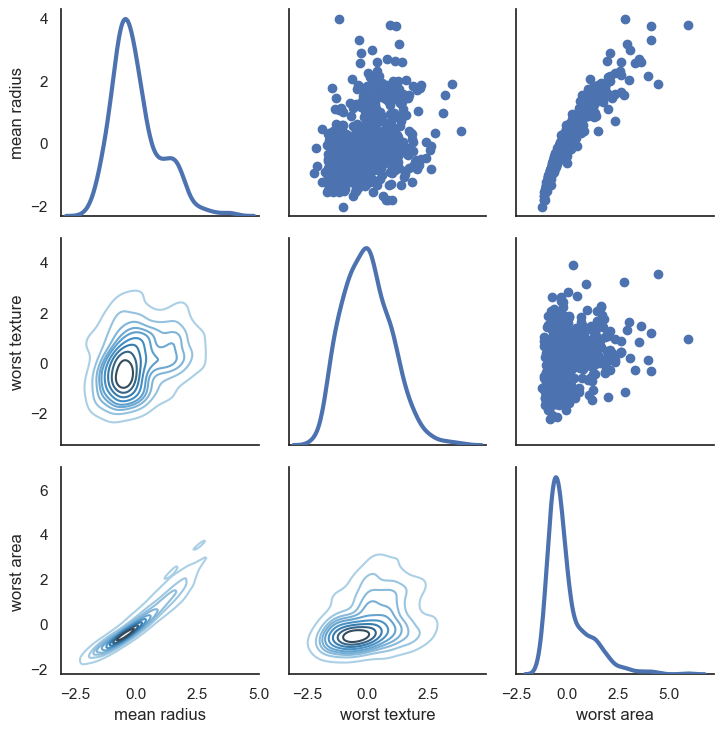

In [51]:
sns.set(style="white")
dd = x_df.loc[:,['mean radius','worst texture','worst area']]
g = sns.PairGrid(dd, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

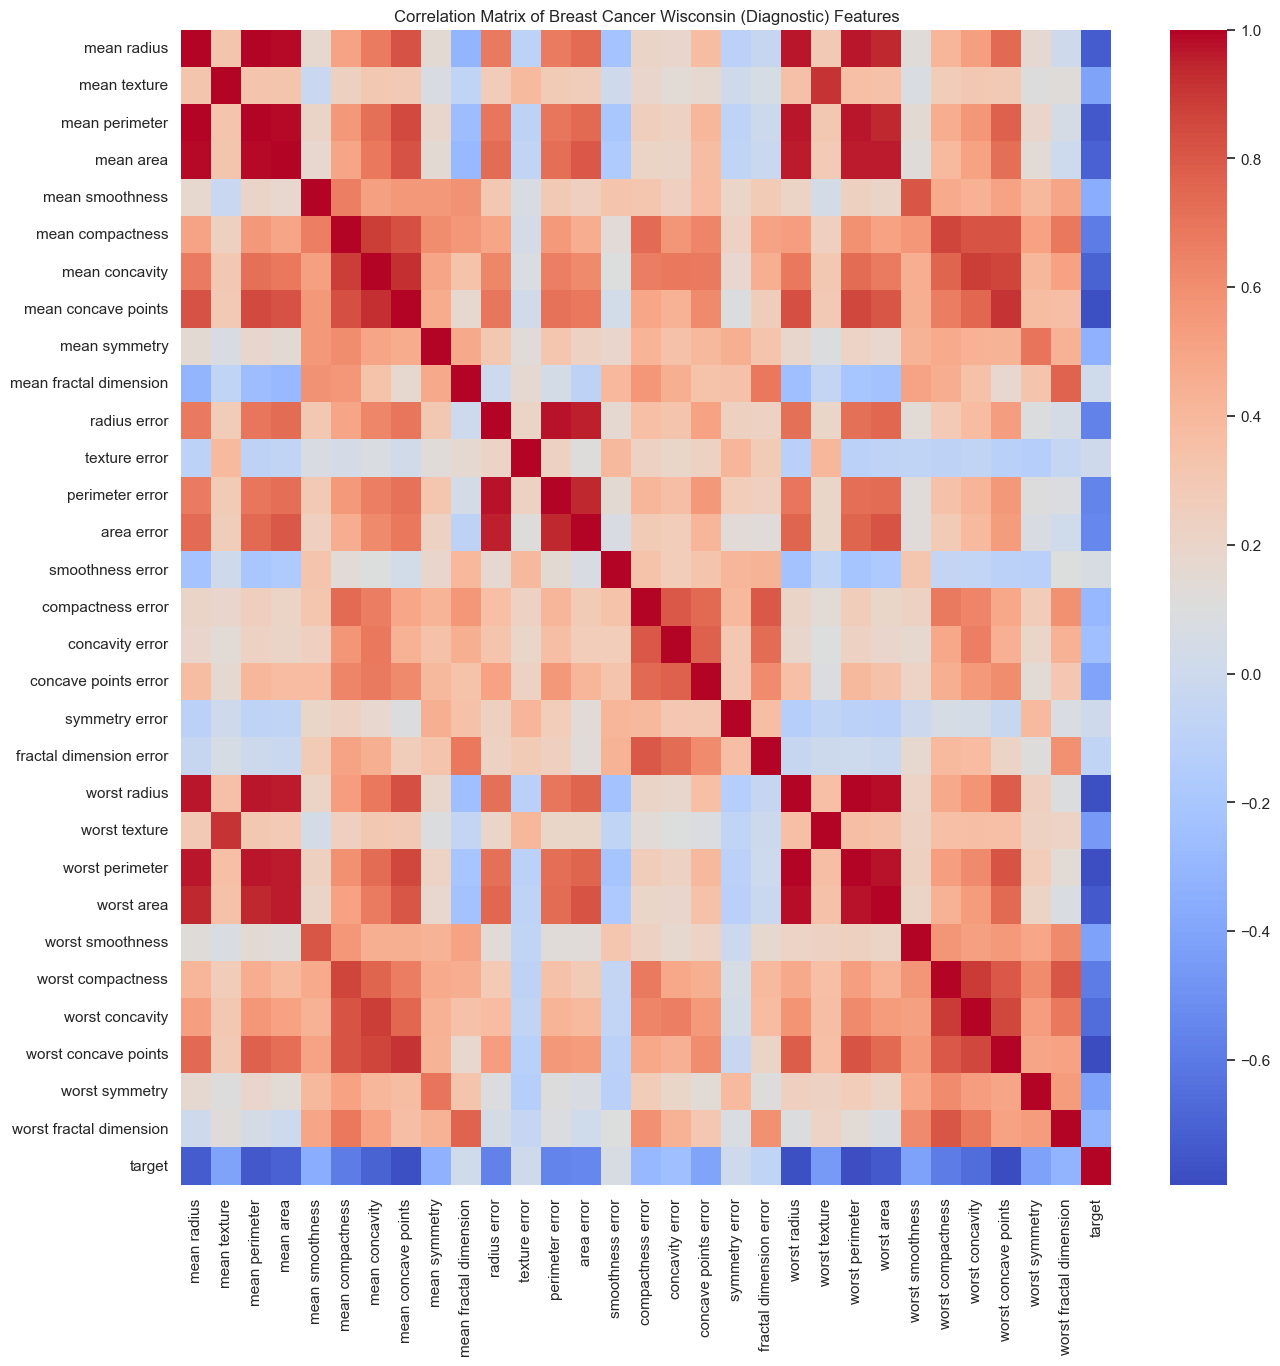

In [52]:
# Perform correlation analysis
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Breast Cancer Wisconsin (Diagnostic) Features')
plt.show()



### 2. Classification with Support Vector Machines (SVM)
* Train an SVM classifier using the preprocessed data.
* Experiment with different kernels (linear, polynomial, and radial basis function) and regularization parameters.
* Evaluate the model using appropriate metrics (accuracy, precision, recall, F1-score, and ROC-AUC).

In [5]:
# Classification with SVM
svm_results = {}

for kernel in ['linear', 'poly', 'rbf']:
    svm = SVC(kernel=kernel, C=1.0)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = svm.score(X_test, y_test)
    precision, recall, f1, _ = classification_report(y_test, y_pred, output_dict=True)['weighted avg'].values()
    roc_auc = roc_auc_score(y_test, y_pred)

    svm_results[kernel] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    }

# Display results
pd.DataFrame(svm_results)


,linear,poly,rbf
Accuracy,0.976608,0.894737,0.970760
Precision,0.976608,0.909774,0.970925
Recall,0.976608,0.894737,0.970760
F1 Score,0.976608,0.890013,0.970807
ROC-AUC,0.974868,0.857143,0.970238


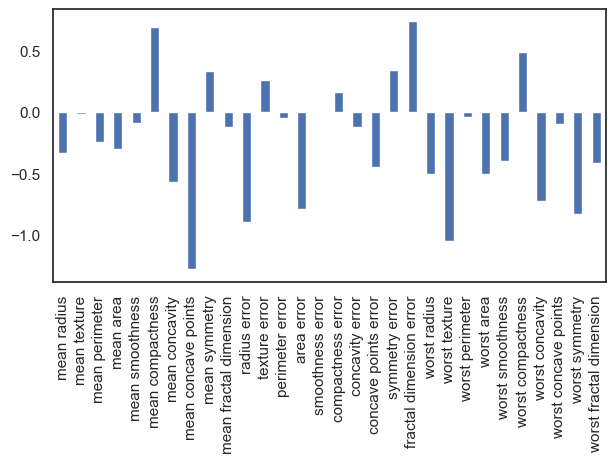

In [6]:
# Only for linear kernel because for others
# data is transformed by kernel method to another space.

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

importances = pd.Series(svm.coef_[0], index=data.feature_names)

fig, ax = plt.subplots()
importances.plot.bar( ax=ax)
fig.tight_layout()




### 3. Classification with Advanced Decision Trees

* Apply advanced decision tree classification techniques such as Random Forest and Gradient Boosting.
* Tune hyperparameters with cross-validation.

* Evaluate the models using the same metrics as for SVM.


In [7]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Classification with Advanced Decision Trees
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}
gb_grid = GridSearchCV(gb, gb_params, cv=5)
gb_grid.fit(X_train, y_train)
gb_best = gb_grid.best_estimator_
y_pred_gb = gb_best.predict(X_test)

# Metrics for Random Forest and Gradient Boosting
rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_pred_rf)
}

gb_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb),
    'Recall': recall_score(y_test, y_pred_gb),
    'F1 Score': f1_score(y_test, y_pred_gb),
    'ROC-AUC': roc_auc_score(y_test, y_pred_gb)
}

results = {'Random Forest': rf_metrics, 'Gradient Boosting': gb_metrics}
pd.DataFrame(results)

,Random Forest,Gradient Boosting
Accuracy,0.970760,0.959064
Precision,0.963964,0.963303
Recall,0.990741,0.972222
F1 Score,0.977169,0.967742
ROC-AUC,0.963624,0.954365


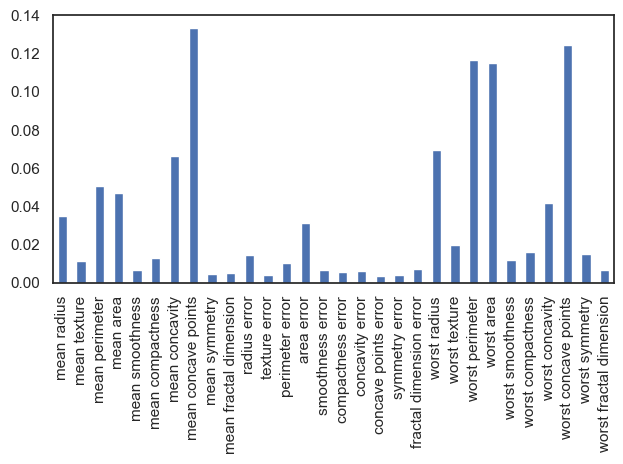

In [8]:
importances = pd.Series(rf_best.feature_importances_, index=data.feature_names)

fig, ax = plt.subplots()
importances.plot.bar( ax=ax)
fig.tight_layout()



### 4. Classification with Generalized Additive Models (GAMs)

* Fit a GAM for classification using the `pyGAM` library.

* Select appropriate link functions and distribution families for the binary classification task.
* Visualize the contribution of each feature to the model using partial dependency plots.
* Evaluate the model using the same metrics as for SVM and decision trees.


![](https://multithreaded.stitchfix.com/assets/images/blog/fig1.svg)

The general form of a GAM can be expressed as:

$$
g(E[Y|X]) = \beta_0 + \sum_{i=1}^{p} f_i(X_i)
$$

Where:
- $ E[Y|X] $ is the expected value of the response variable $ Y $ given the predictors $ X $.
- $ g(\cdot) $ is the link function.
- $ \beta_0 $ is the intercept.
- $ f_i(X_i) $ are the smooth functions of the predictors.
- $ p $ is the number of predictors.


#### Distribution Function
- The `distribution` function specifies the probability distribution of the response variable $ Y$.
- It influences the form of the likelihood function used in the model fitting process.
-  Common distributions are:
    1. **Continuous and Normally Distributed Response**: Use a Gaussian distribution (default for `LinearGAM`).
    2. **Binary Outcomes**: Use a binomial distribution (common in `LogisticGAM`).
    3. **Count Data**: A Poisson distribution is more appropriate (default for `PoissonGAM`).

    and etc.

#### Link Function
- The `link` function $ g(\cdot)$ is used to connect the linear predictor with the **mean of the distribution function**.
- It transforms the expected value of $ Y $ to the scale of the linear predictor.
- Examples of link functions are the identity link (for Gaussian), logit link (for Binomial), and log link (for Poisson).


In [42]:
# https://pygam.readthedocs.io/en/latest/api/api.html#generalized-additive-model-classes
from pygam import LogisticGAM, LinearGAM, s,l, te, GAM, terms
GAM?

In [10]:
gam1 = LogisticGAM()
print(gam1.distribution)
print(gam1.link)
gam2 = GAM(distribution='binomial', link='identitylink')
print(gam2)

binomial
logit
GAM(callbacks=['deviance', 'diffs'], distribution='binomial', 
   fit_intercept=True, link='identitylink', max_iter=100, 
   terms='auto', tol=0.0001, verbose=False)


### Smoothing Splines in pyGAM

Using `lam` (lambda) hyperparameter is the penalization term that is multiplied to the second derivative in the overall objective function.

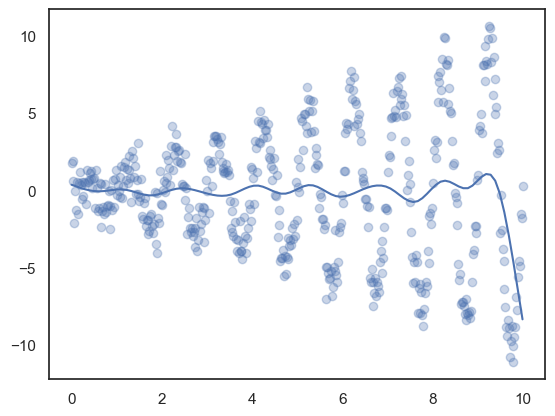

In [48]:
X = np.linspace(0,10,500)
y = np.sin(X*2*np.pi)*X + np.random.randn(len(X))

gam = LinearGAM(). fit(X,y)
#gam = LinearGAM(lam=1e6, n_splines=50). fit(X,y)

XX = gam.generate_X_grid(term=0)
plt.scatter(X,y,alpha=0.3);
plt.plot(XX, gam.predict(XX));

#### For S(.)
- **n_splines** refers to the number of splines to use in each of the smooth function that is going to be fitted.
- **lam** parameter.

- **`.fit()`** or **`.greadsearch()`**: We can use either to fit GAMs on a training data but `.greadsearch()` performs a grid search over *the space of all tunable parameters* (can be very slow).


In [49]:
# Classification with Generalized Additive Models (GAMs)
gam = LogisticGAM(s(0, n_splines=10) + s(1) + s(2) + s(6)+ s(8)+ te(5,8, n_splines =[13,13])  ).fit(X_train, y_train)

y_pred_gam = gam.predict(X_test)

# Metrics for GAM
gam_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_gam),
    'Precision': precision_score(y_test, y_pred_gam),
    'Recall': recall_score(y_test, y_pred_gam),
    'F1 Score': f1_score(y_test, y_pred_gam),
    'ROC-AUC': roc_auc_score(y_test, y_pred_gam)
}
pd.DataFrame({'GAM':gam_metrics})

,GAM
Accuracy,0.970760
F1 Score,0.977169
Precision,0.963964
ROC-AUC,0.963624
Recall,0.990741


### Partial dependency:
* Shows relationship between a predictor variable and the predicted outcome, while averaging out the effects of all other predictor variables. 

* Whether the relationship between the predictor and the response is positive or negative. 
* A steeper plot suggests a stronger relationship.
* Can reveal complex patterns --> a U-shaped plot suggests a quadratic relationship.
* Partial dependency plots assume independence between features, which might not always be true in real-world datasets. 




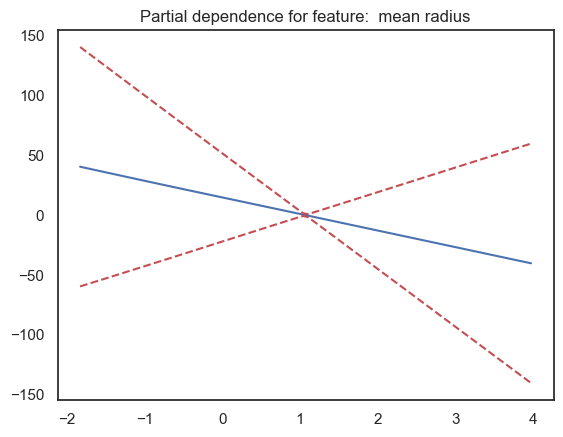

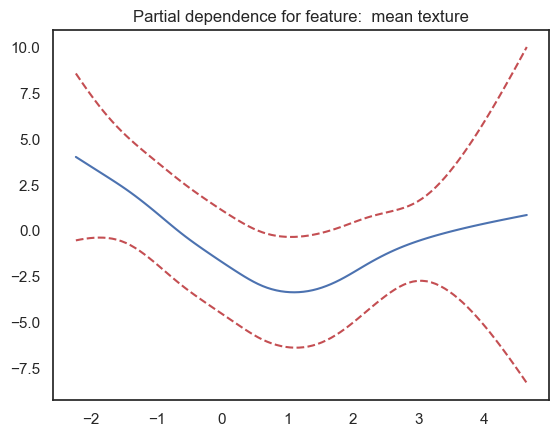

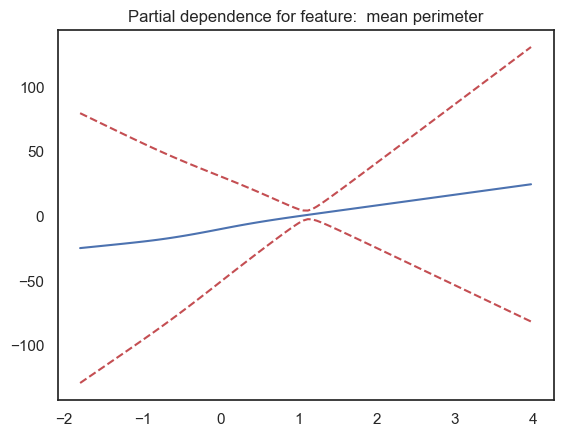

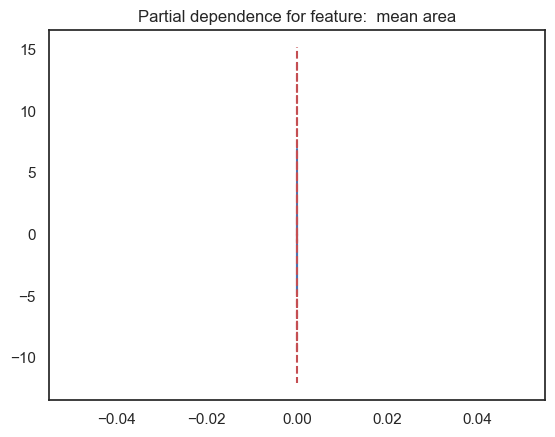

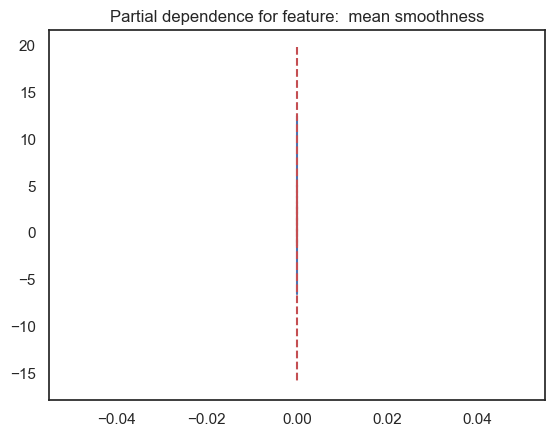

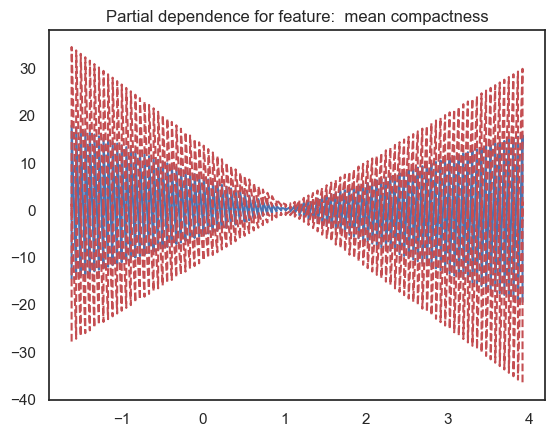

In [36]:
f = data.feature_names

for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    plt.figure()
    plt.plot(XX[:, i], pdep)
    plt.plot(XX[:, i], confi, c='r', ls='--')
    plt.title(f'Partial dependence for feature:  {f[i]}')
    plt.show()


In [37]:

# Combine results
results = {'Random Forest': rf_metrics, 
           'Gradient Boosting': gb_metrics, 'SVM_linear':svm_results['linear'],
           'SVM_poly':svm_results['poly'],
           'SVM_RBF':svm_results['rbf'],'GAM': gam_metrics
          }
pd.DataFrame(results)



,Random Forest,Gradient Boosting,SVM_linear,SVM_poly,SVM_RBF,GAM
Accuracy,0.970760,0.959064,0.976608,0.894737,0.970760,0.970760
Precision,0.963964,0.963303,0.976608,0.909774,0.970925,0.963964
Recall,0.990741,0.972222,0.976608,0.894737,0.970760,0.990741
F1 Score,0.977169,0.967742,0.976608,0.890013,0.970807,0.977169
ROC-AUC,0.963624,0.954365,0.974868,0.857143,0.970238,0.963624








### 5. Model Comparison and Analysis
* Compare the performance of SVM, advanced decision trees, and GAMs.
* Use confusion matrices and ROC curves to visualize the performance differences.
* Discuss the strengths and weaknesses of each model in the context of the dataset.


### 6. Conclusion
* Summarize the findings from the model comparisons.
* Provide insights into which model performed best and hypothesize why.
* Discuss any potential improvements or alternative approaches that could be explored.




## How to Submit
- First, a Jupyter Notebook containing all the code, comments, and analysis.
- Second report cells in the same Jupyter Notebook, summarizing your findings, including results and a discussion of the results.
- Finally convert the Jupyter Notebook to PDF.
- **Don't write your name**.
- Upload the PDF into convas.

## Evaluation Criteria (peer grading)
- Correctness of the implementation of all regression and classification models. (2 points)
- Quality of the EDA and preprocessing steps. (1 point)
- Depth of the analysis in comparing the models.(1 point)
- Clarity and organization of the submitted report and Jupyter Notebook. (1 point)

